In [8]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import json

image_path = "/root/GUI-Memory/data/android_in_the_zoo/test_sample/general/GENERAL-4796150115256817663/GENERAL-4796150115256817663_0.png"
def show_image(image_path):
    image = Image.open(image_path)
    display(image)

mode = "flow_with_memory"
memory = True

tasks = next(os.walk(f"/root/GUI-Memory/CoAT/android-in-the-zoo/intermediate/openai/{mode}"))[1]
print(len(tasks))

20


In [9]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import imagesize
# from source.datasets.aitz.action_utils import match_ui_bbox, _resize_annotation_bounding_boxes


def visualize_bboxes(image_path, annotation_abs_positions, point_yx_dict=None, point_radius=15, color="red"):
    # 打开图片
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # 遍历每个边界框并绘制红色方框
    for bbox in annotation_abs_positions:
        # print(bbox)
        y_top_left, x_top_left, box_height, box_width = bbox
        x_bottom_right = x_top_left + box_width
        y_bottom_right = y_top_left + box_height
        draw.rectangle([x_top_left, y_top_left, x_bottom_right, y_bottom_right], outline=color, width=2)

    if point_yx_dict is not None:
        # 绘制橙黄色圆点
        point_y, point_x = point_yx_dict["touch_yx"]
        draw.ellipse(
            (point_x - point_radius, point_y - point_radius, point_x + point_radius, point_y + point_radius),
            fill="green",
            outline="yellow"
        )

        point_y, point_x = point_yx_dict["lift_yx"]
        draw.ellipse(
            (point_x - point_radius, point_y - point_radius, point_x + point_radius, point_y + point_radius),
            fill="purple",
            outline="yellow"
        )

    # 显示图片
    plt.figure(dpi=200)
    plt.imshow(image)
    plt.axis('off')  # 关闭坐标轴
    plt.show()

# 显示原始UI标记，返回对应的ui元素位置列表
def show_step_uis(step, idx=None):
    # 示例用法
    image_path = f"/root/GUI-Memory/data/android_in_the_zoo/test_sample/{step['image_path']}"
    annotation_abs_positions = eval(step["ui_positions"])
    # print(annotation_abs_positions)
    width, height = imagesize.get(image_path)
    result_touch_yx = eval(step['result_touch_yx'])
    y_touch = result_touch_yx[0] * height
    x_touch = result_touch_yx[1] * width    
    result_lift_yx = eval(step['result_lift_yx'])
    y_lift = result_lift_yx[0] * height
    x_lift = result_lift_yx[1] * width

    yx_item = {"touch_yx": (y_touch, x_touch), "lift_yx": (y_lift, x_lift)}
    visualize_bboxes(image_path, annotation_abs_positions, yx_item)

    if idx is not None:
        visualize_bboxes(image_path, [annotation_abs_positions[idx]], color="blue")




************



general-6458194457574888611


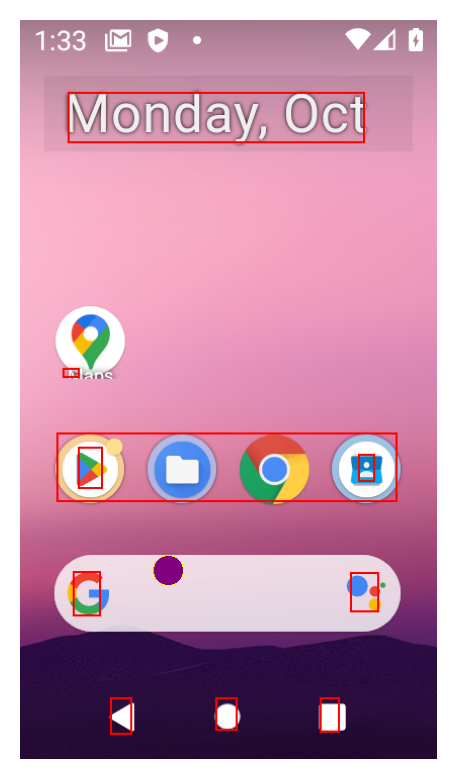

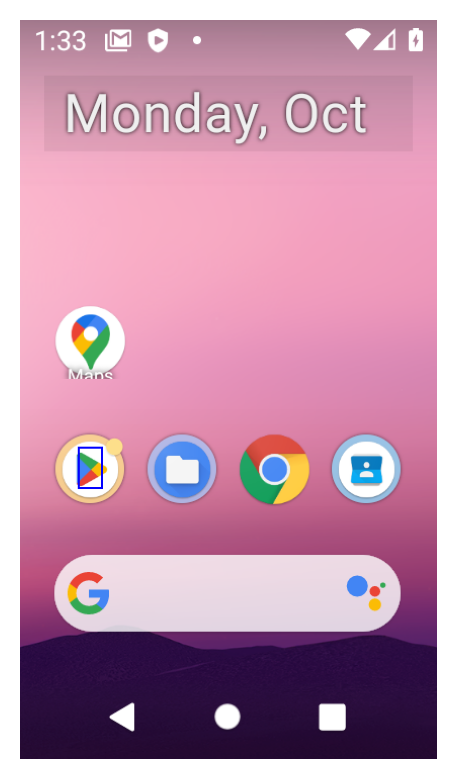

{'user_request': "What's the news this evening?", 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/general/GENERAL-6458194457574888611/GENERAL-6458194457574888611_0.png', 'screen_desc': 'The screenshot displays a smartphone home screen with a pink gradient background. The date and time are shown at the top: "Monday, Oct" and 1:33. There are several app icons visible: Google Maps, Google Play Store, Files, Google Chrome, and a contact-related app, followed by a Google search bar at the bottom. The navigation buttons (back, home, and recent apps) are also visible.'}
{'user_request': "What's the news this evening?", 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/general/GENERAL-6458194457574888611/GENERAL-6458194457574888611_0.png', 'screen_desc': 'The screenshot displays a smartphone home screen with a pink gradient background. The date and time are shown at the top: "Monday, Oct" and 1:33. There are several app icons visible: Google Maps, Google P

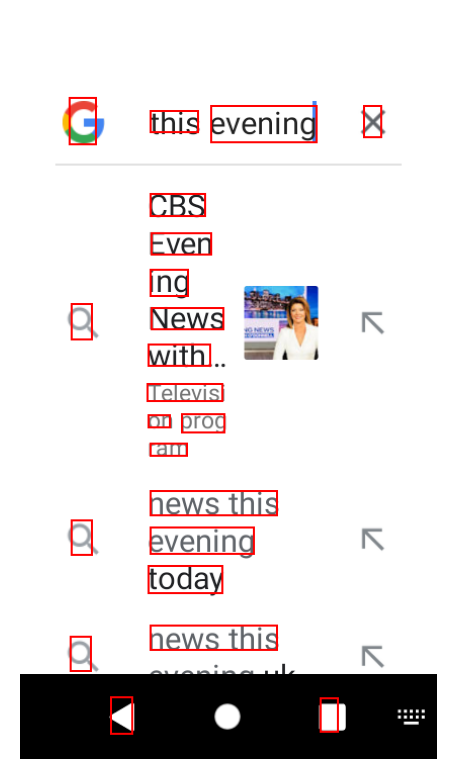

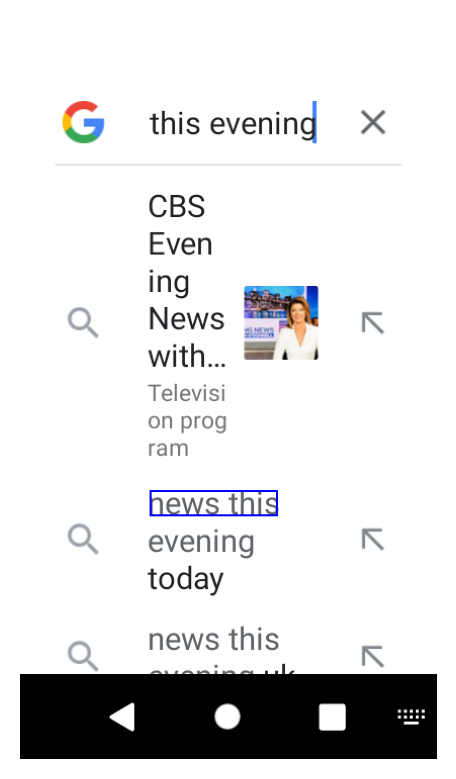

{'user_request': "What's the news this evening?", 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/general/GENERAL-6458194457574888611/GENERAL-6458194457574888611_2.png', 'screen_desc': 'The screenshot displays a Google search interface with the query "this evening" typed into the search bar. Below the search bar, several suggested search results appear, including "CBS Evening News with..." and other related queries such as "news this evening today" and "news this evening uk." The interface provides options to refine the search, with an option to go back and close the search at the top.'}
{'user_request': "What's the news this evening?", 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/general/GENERAL-6458194457574888611/GENERAL-6458194457574888611_2.png', 'screen_desc': 'The screenshot displays a Google search interface with the query "this evening" typed into the search bar. Below the search bar, several suggested search results appear, including

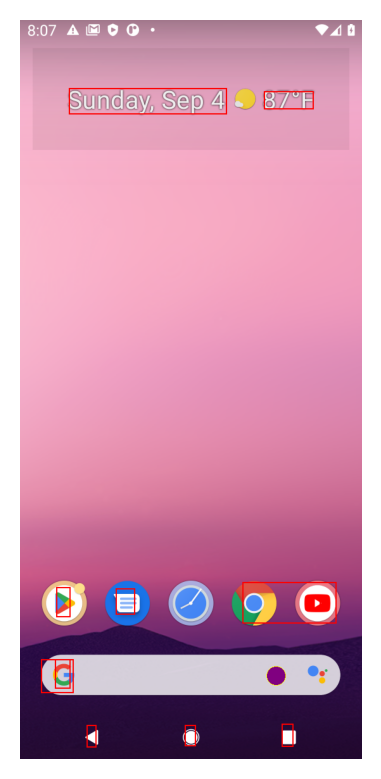

{'user_request': 'Search for handmade jewelry on Etsy.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3415759859034183184/WEB_SHOPPING-3415759859034183184_1.png', 'screen_desc': "It seems there isn't an image available right now for me to analyze. Could you upload it again? I'd be happy to help!"}
{'user_request': 'Search for handmade jewelry on Etsy.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3415759859034183184/WEB_SHOPPING-3415759859034183184_1.png', 'screen_desc': "It seems there isn't an image available right now for me to analyze. Could you upload it again? I'd be happy to help!", 'history_actions': ['press the home button'], 'think': {'Thought': "The current screen shows the home screen of the mobile device, with several icons at the bottom. The user has requested to search for handmade jewelry on Etsy. Since the Etsy app is not visible on the home screen, the next step is to ei

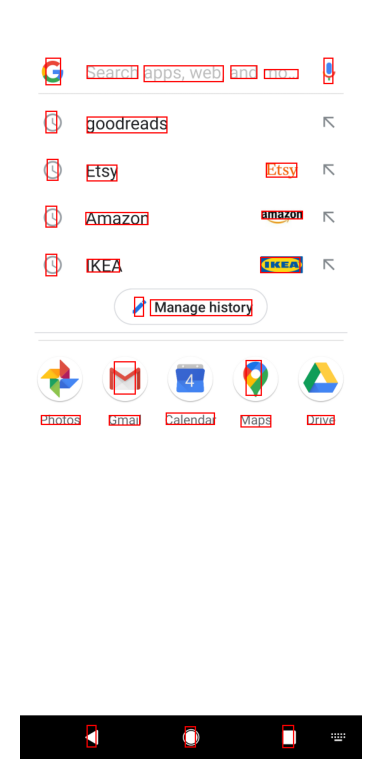

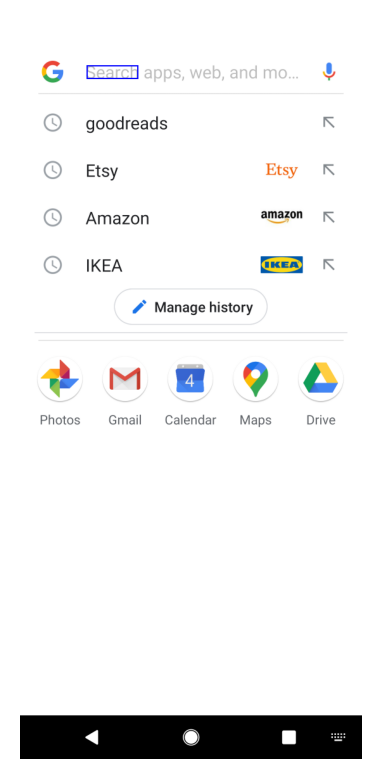

{'user_request': 'Search for handmade jewelry on Etsy.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3415759859034183184/WEB_SHOPPING-3415759859034183184_2.png', 'screen_desc': "The screenshot shows a Google search interface on a mobile device, with recent app and web search history. It includes links to Goodreads, Etsy, Amazon, and IKEA, each with their respective logos. Below the search bar, there's an option to manage the search history. The bottom row contains quick access icons for Photos, Gmail, Calendar, Maps, and Drive."}
{'user_request': 'Search for handmade jewelry on Etsy.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3415759859034183184/WEB_SHOPPING-3415759859034183184_2.png', 'screen_desc': "The screenshot shows a Google search interface on a mobile device, with recent app and web search history. It includes links to Goodreads, Etsy, Amazon, and IKEA, each with their respect

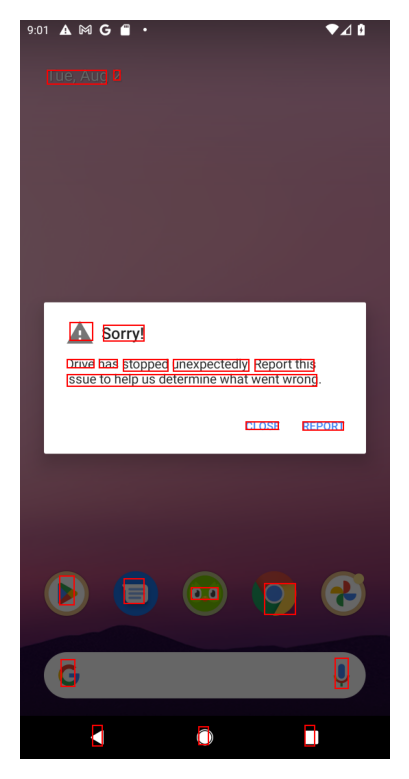

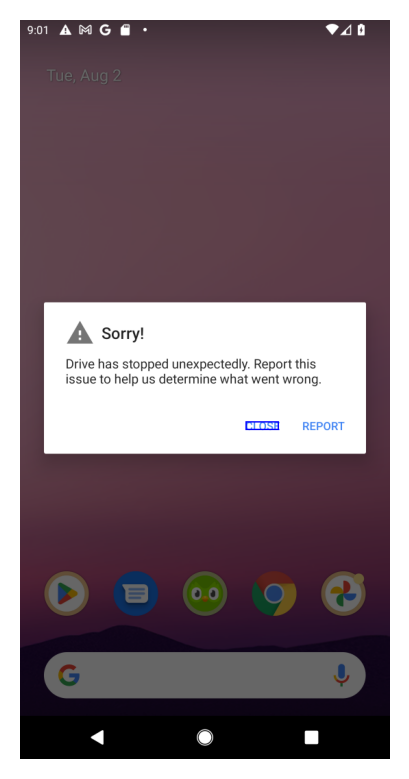

{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_0.png', 'screen_desc': 'The screenshot shows an error message on an Android device. The message states that the Google Drive app has stopped unexpectedly. It offers two options: "CLOSE" to dismiss the message and "REPORT" to send details about the issue for troubleshooting. The device\'s home screen with app icons is visible at the bottom.'}
{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_0.png', 'screen_desc': 'The screenshot shows an error message on an Android device. The message states that the Google Drive app has stopped unexpectedly. It offers two options: "CLOSE" to dismiss the message and "REPORT" to send details about 

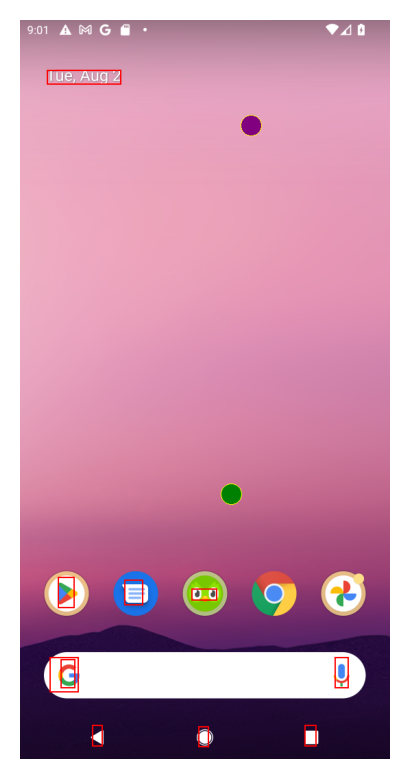

{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_1.png', 'screen_desc': "It seems that you uploaded an image, but I'm unable to process its content directly. Could you describe the screenshot or share its details, and I can help accordingly?"}
{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_1.png', 'screen_desc': "It seems that you uploaded an image, but I'm unable to process its content directly. Could you describe the screenshot or share its details, and I can help accordingly?", 'history_actions': ['press the home button'], 'think': {'Thought': "The user wants to uninstall the 'Lyft - Rideshare, Bikes, Scooters & Transit' app. The current screen shows the home screen, but i

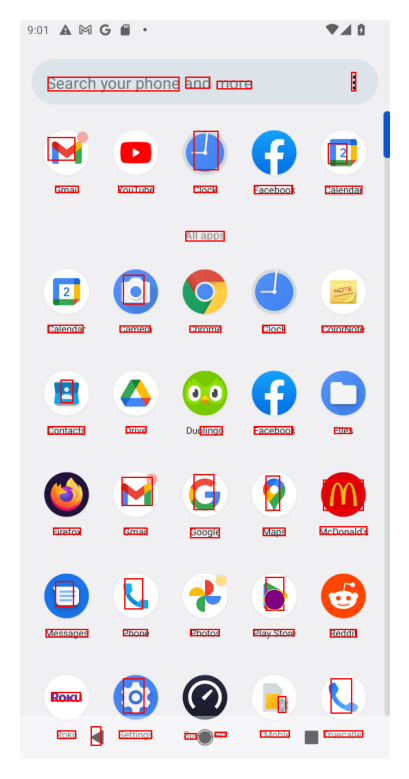

{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_2.png', 'screen_desc': 'This screenshot displays the home screen of an Android smartphone with a grid of app icons. At the top, there is a search bar labeled "Search your phone and more," indicating a search function for apps or content. The apps include Gmail, YouTube, Facebook, Camera, Google Chrome, and various others such as Maps, McDonald\'s, and Reddit. The bottom row includes icons for settings, speed test, and Truecaller, among others, for easy access to various phone utilities and applications.'}
{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_2.png', 'screen_desc': 'This screenshot displays the home screen of an Androi

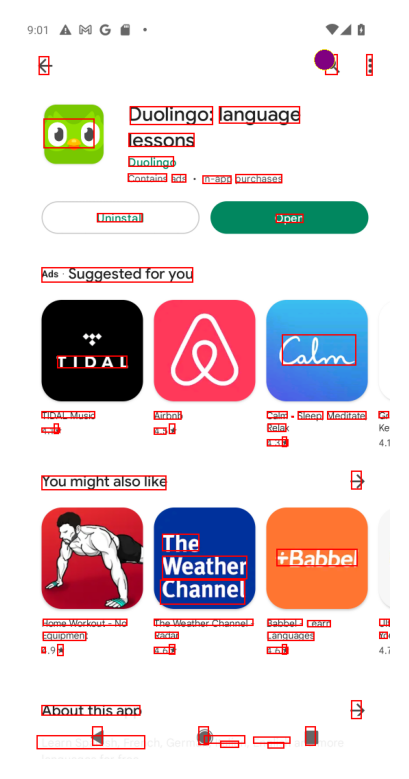

{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_3.png', 'screen_desc': 'The screenshot displays the Google Play Store page for the Duolingo app. It shows the app\'s name, "Duolingo: language lessons," along with the option to either uninstall or open the app. Below, there are suggested apps such as TIDAL, Airbnb, and Calm, along with user ratings. Additionally, the "You might also like" section lists other apps like Home Workout, The Weather Channel, and Babbel. At the bottom, there is information about the app, including available languages and free learning options.'}
{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_3.png', 'screen_desc': 'The screenshot displays the Google 

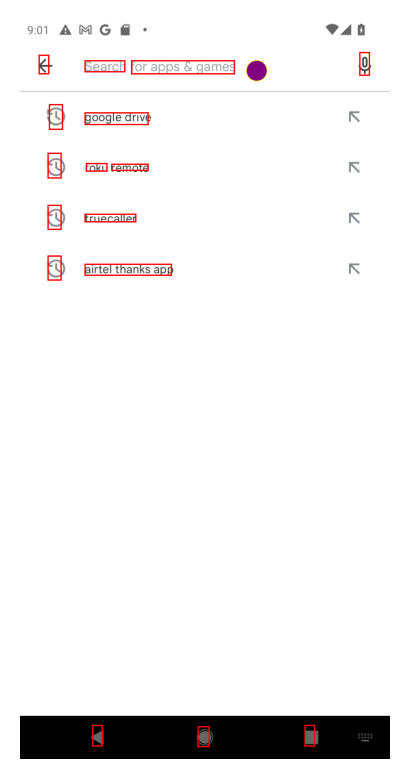

{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_4.png', 'screen_desc': "It seems there was an issue with receiving the screenshot. Could you please upload the image again? I'll be happy to help describe it."}
{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_4.png', 'screen_desc': "It seems there was an issue with receiving the screenshot. Could you please upload the image again? I'll be happy to help describe it.", 'history_actions': ['press the home button', 'scroll up', 'click on the "Play Store" icon located at the right and lower part of the screen.', 'click on the magnifying glass search icon located at the top-right corner.'], 'think': {'Thought': "The user has asked to 

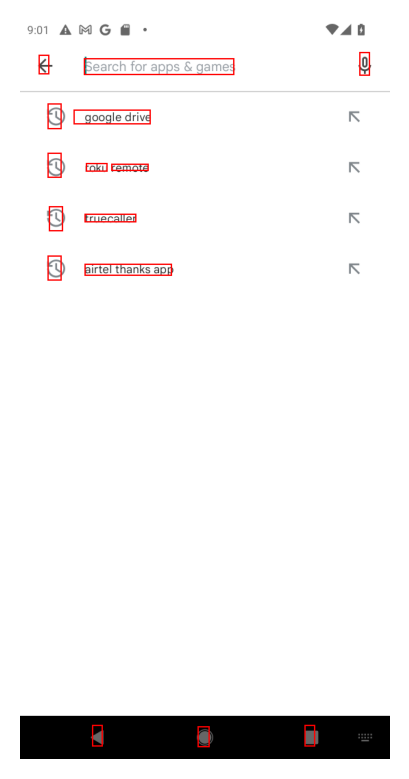

{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_5.png', 'screen_desc': 'This screenshot displays the "Search for apps & games" section on a mobile device, showing recently searched apps. The list includes Google Drive, Roku Remote, Truecaller, and the Airtel Thanks app. Each entry has an icon and an arrow, likely for opening or accessing the app\'s details. The search bar at the top allows the user to search for additional apps or games.'}
{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_5.png', 'screen_desc': 'This screenshot displays the "Search for apps & games" section on a mobile device, showing recently searched apps. The list includes Google Drive, Roku Remote, Truecall

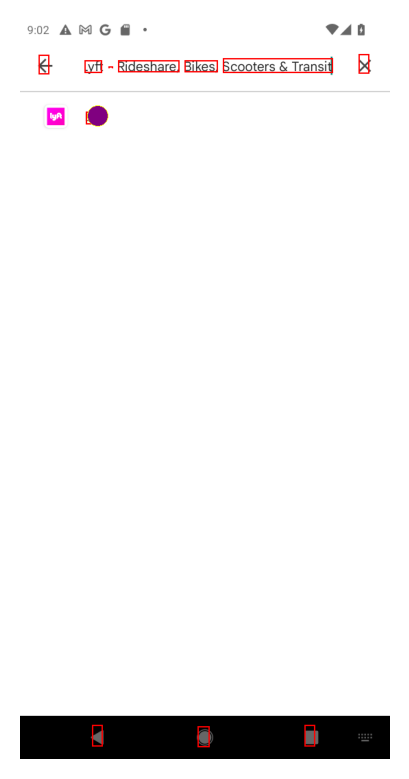

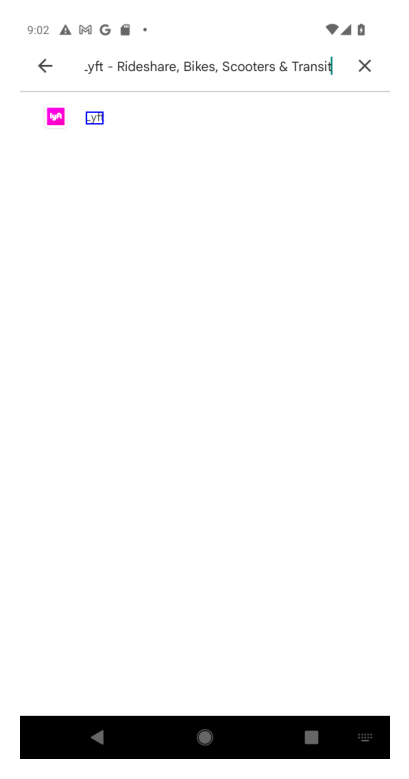

{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_6.png', 'screen_desc': 'The screenshot shows a search bar in a mobile app with the keyword “.yft - Rideshare, Bikes, Scooters & Transit.” The Lyft logo is visible, indicating that the user is likely searching for information related to the Lyft service, such as rideshare options, bikes, or scooters. The screen appears to be in a search or browsing mode with minimal additional content visible.'}
{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_6.png', 'screen_desc': 'The screenshot shows a search bar in a mobile app with the keyword “.yft - Rideshare, Bikes, Scooters & Transit.” The Lyft logo is visible, indicating that the user i

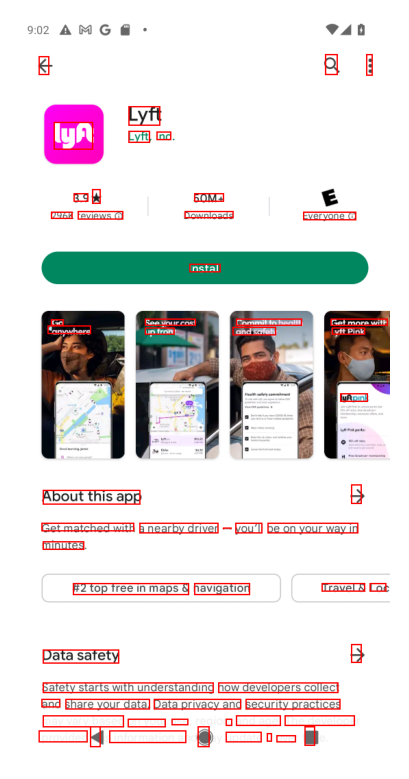

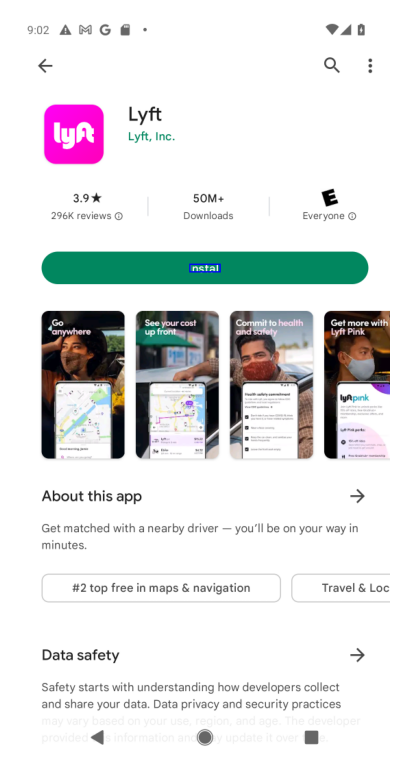

{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_7.png', 'screen_desc': 'This is the Google Play Store page for the Lyft app. It shows the app\'s name, rating (3.9 stars from 296K reviews), download count (50M+), and a description of the app\'s features like safety and cost transparency. Below the app screenshots, it also includes an "Install" button for downloading the app. Additionally, there\'s a section about the app’s data safety practices.'}
{'user_request': 'uninstall "Lyft - Rideshare, Bikes, Scooters & Transit"', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/install/INSTALL-689623307793919007/INSTALL-689623307793919007_7.png', 'screen_desc': 'This is the Google Play Store page for the Lyft app. It shows the app\'s name, rating (3.9 stars from 296K reviews), download count (50M+), and a description of 

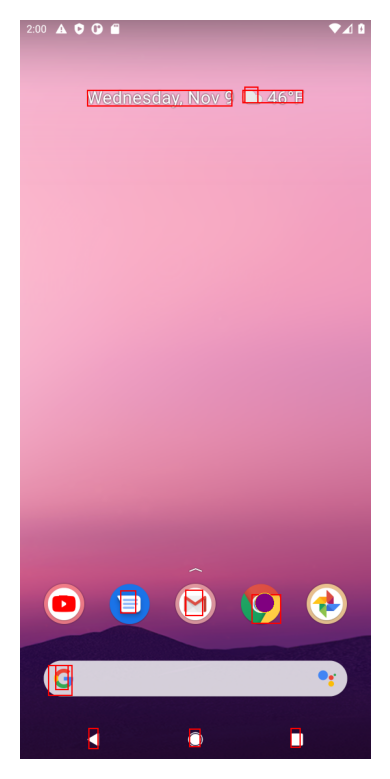

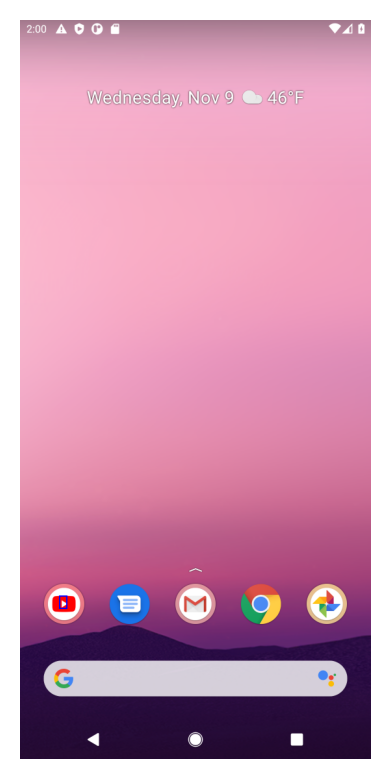

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_0.png', 'screen_desc': 'The screenshot shows the home screen of a smartphone with a soft pink gradient background. At the top, the date (Wednesday, Nov 9), weather (46°F, cloudy), and time (2:00) are displayed. Below, there are app icons for YouTube, Messages, Gmail, Chrome, and Google Photos, followed by the Google search bar at the bottom. The phone also features a simple navigation interface with an upward arrow button and a home button at the bottom.'}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_0.png', 'screen_desc': 'The screenshot shows the home scr

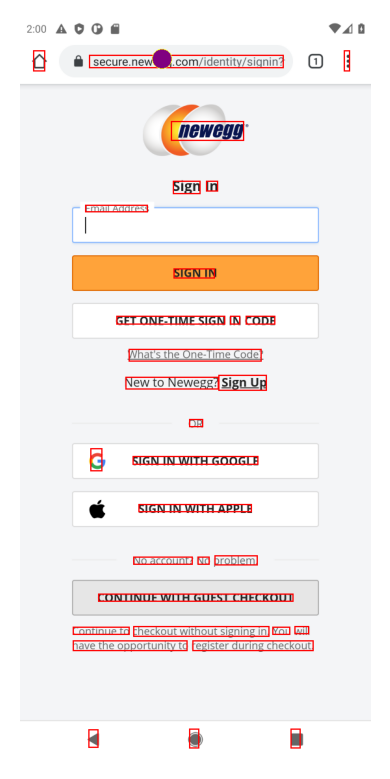

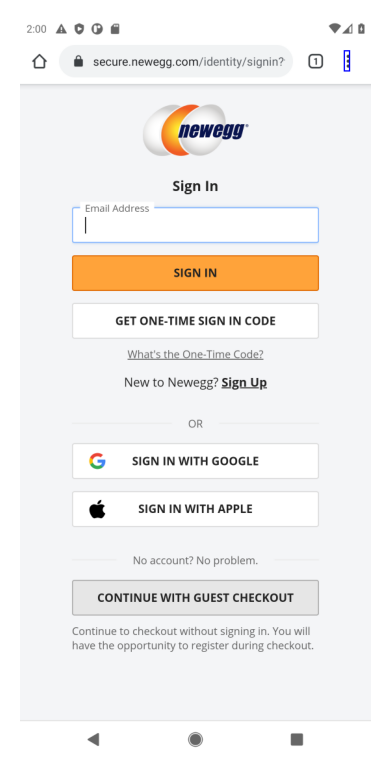

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_1.png', 'screen_desc': 'The screenshot displays the sign-in page for Newegg. It prompts the user to enter their email address to sign in, with an option to use a one-time code. Below the sign-in button, there are options to sign in with Google or Apple accounts. Additionally, users can continue as a guest without signing in.'}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_1.png', 'screen_desc': 'The screenshot displays the sign-in page for Newegg. It prompts the user to enter their email address to sign in, with an option to use a one-time code. Below the si

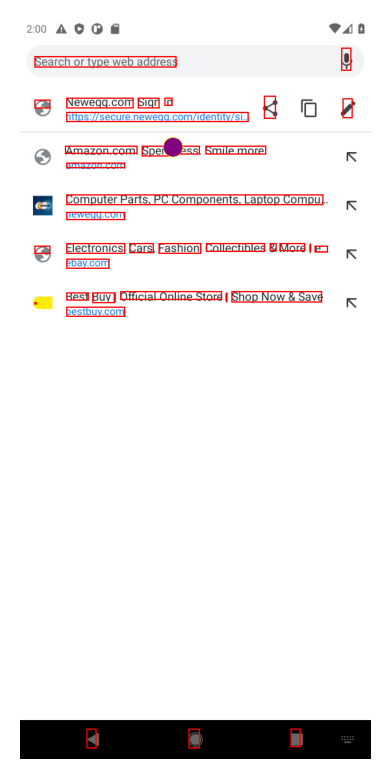

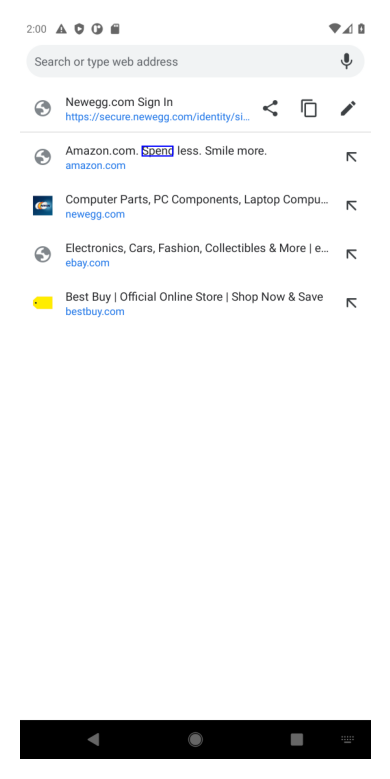

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_2.png', 'screen_desc': 'It appears that the image provided is not accessible for me to view or describe. Could you please upload the image again or provide more context?'}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_2.png', 'screen_desc': 'It appears that the image provided is not accessible for me to view or describe. Could you please upload the image again or provide more context?', 'history_actions': ['click on the "Chrome" browser app icon located at the lower right part of the screen.', "click on the browser's address/URL bar located at the middle and

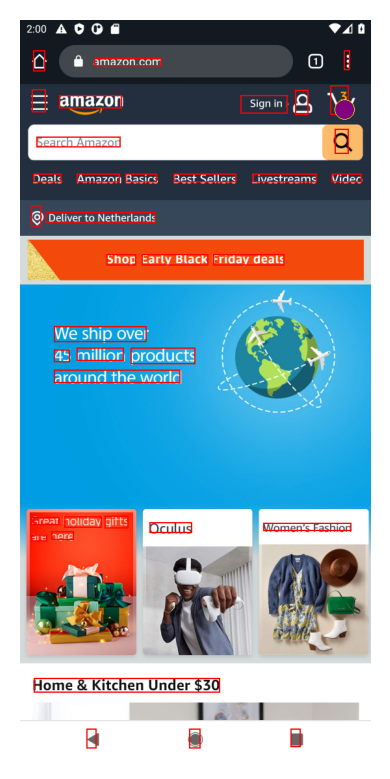

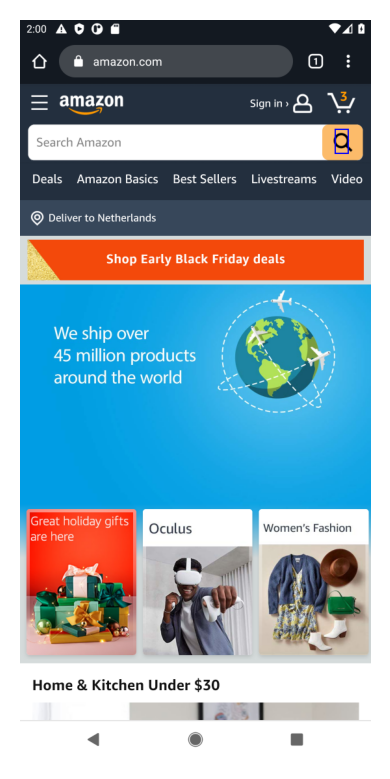

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_5.png', 'screen_desc': 'The screenshot displays the Amazon homepage on a mobile device. At the top, there\'s a search bar for browsing products and links to deals, categories, and the user’s cart. The central area highlights a banner promoting early Black Friday deals and global shipping. Below, there are product categories such as "Great holiday gifts," "Oculus," and "Women\'s Fashion." Additionally, a "Home & Kitchen Under $30" section is visible.'}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_5.png', 'screen_desc': 'The screenshot displays the Amazon hom

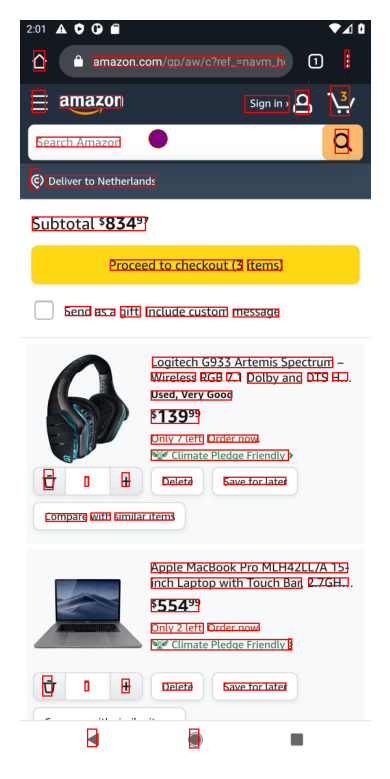

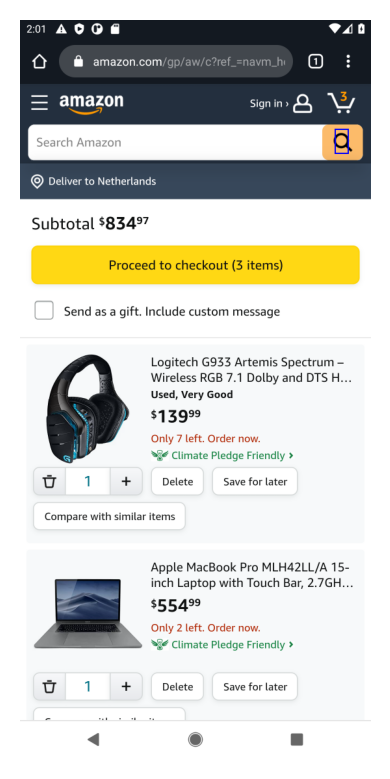

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_6.png', 'screen_desc': "The screenshot shows a shopping cart on Amazon with a subtotal of $834.97 for three items. The items include a Logitech G933 Artemis Spectrum headset priced at $139.99 and an Apple MacBook Pro for $554.99. There are options to delete items, save them for later, or compare them with similar items. Additionally, there's a checkbox to send items as a gift and proceed to checkout."}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_6.png', 'screen_desc': "The screenshot shows a shopping cart on Amazon with a subtotal of $834.97 for three item

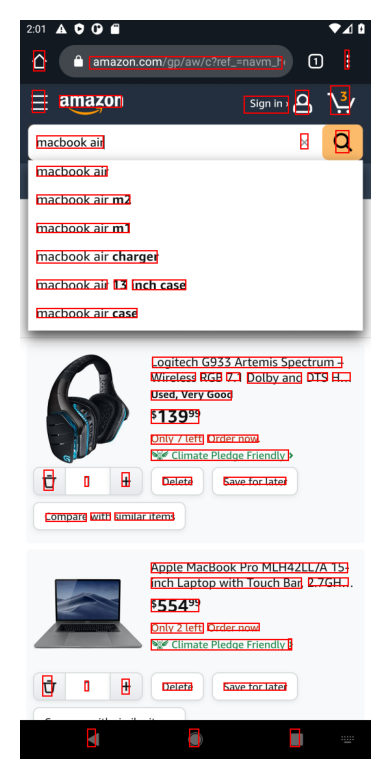

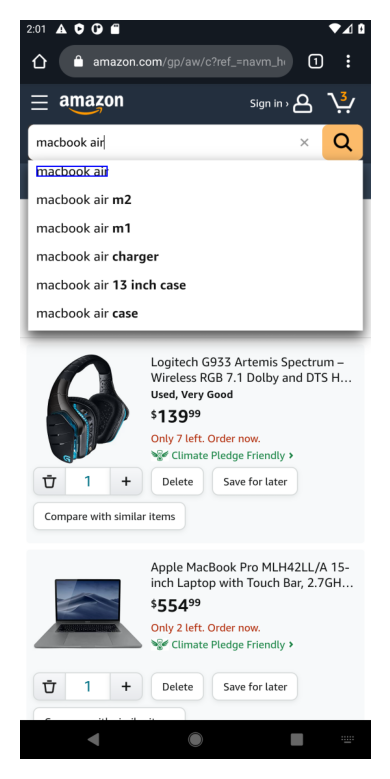

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_8.png', 'screen_desc': 'The screenshot shows the Amazon mobile website, where the user is searching for "MacBook Air." The search suggestions include variations like MacBook Air models (M1, M2), accessories, and cases. Below the search bar, there is a product listing for a Logitech headset priced at $139.99 and a MacBook Pro priced at $554.99, each with limited stock left. Users can add items to their cart or save them for later.'}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_8.png', 'screen_desc': 'The screenshot shows the Amazon mobile website, where the 

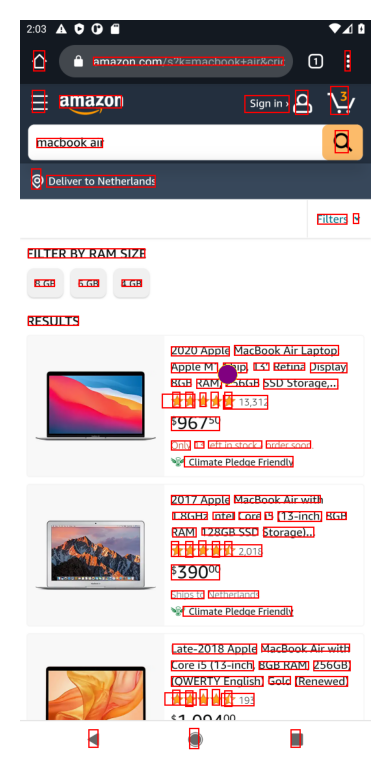

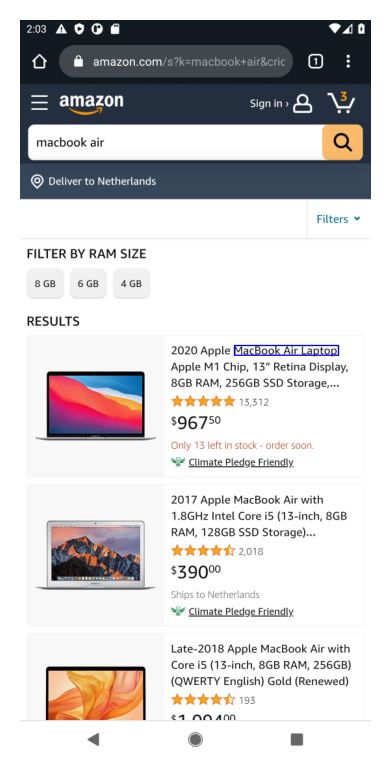

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_9.png', 'screen_desc': "It seems like the image didn't load properly. Could you please upload the screenshot again, and I'll describe it for you?"}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_9.png', 'screen_desc': "It seems like the image didn't load properly. Could you please upload the screenshot again, and I'll describe it for you?", 'history_actions': ['click on the "Chrome" browser app icon located at the lower right part of the screen.', "click on the browser's address/URL bar located at the middle and top part of the screen.", 'click on the second 

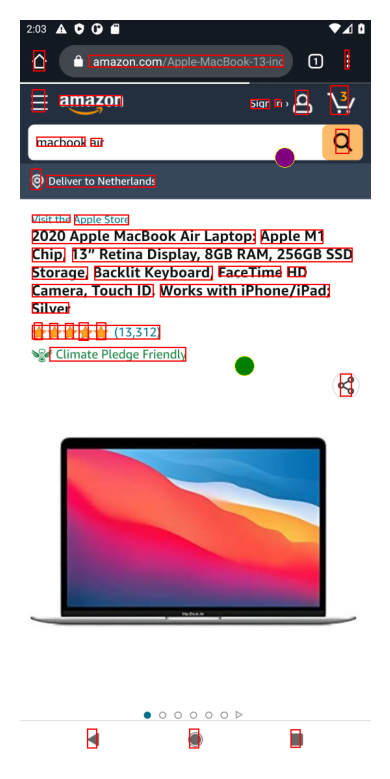

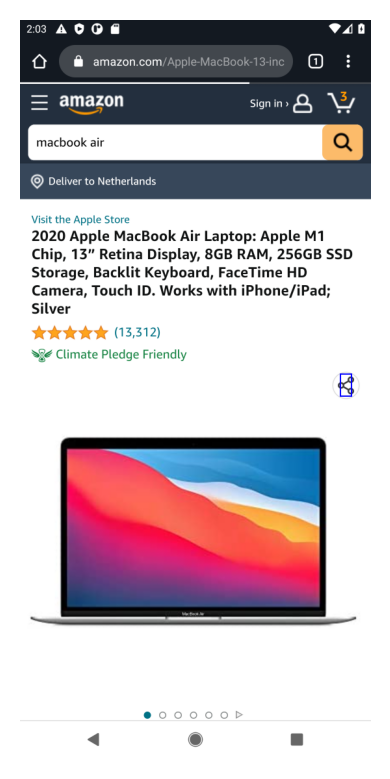

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_10.png', 'screen_desc': "It seems that you've uploaded an image, but I can't access or interpret it directly in this format. If you'd like, I can assist you with any other type of description or action."}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_10.png', 'screen_desc': "It seems that you've uploaded an image, but I can't access or interpret it directly in this format. If you'd like, I can assist you with any other type of description or action.", 'history_actions': ['click on the "Chrome" browser app icon located at the lower right part of the screen.',

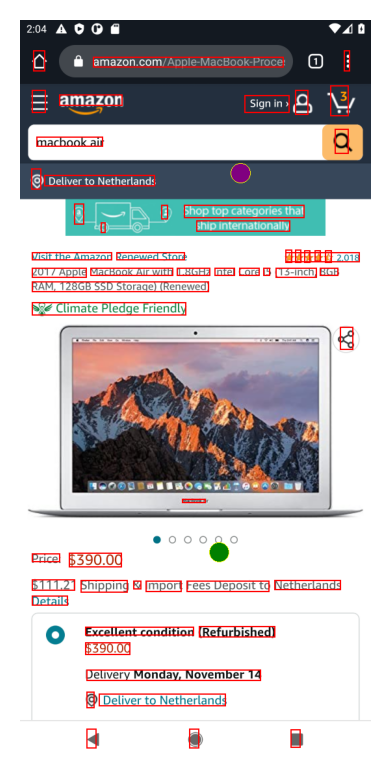

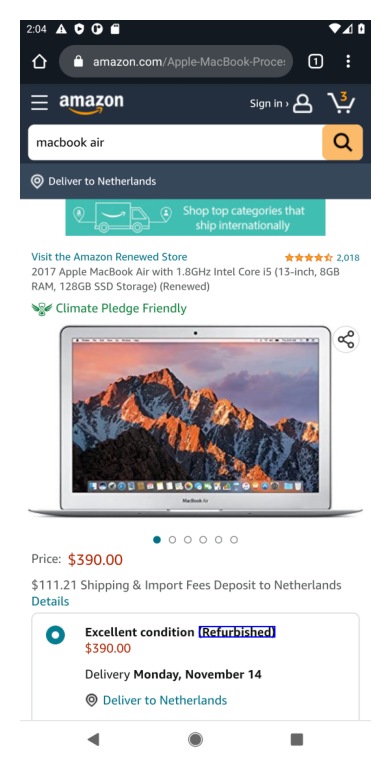

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_15.png', 'screen_desc': 'The screenshot shows a product page for a 2017 Apple MacBook Air on Amazon. The item is listed as refurbished, featuring a 1.8GHz Intel Core i5, 8GB RAM, and 128GB SSD. The price is $390, with an additional $111.21 for shipping and import fees to the Netherlands. It is marked as "Climate Pledge Friendly" and has a delivery date of Monday, November 14.'}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_15.png', 'screen_desc': 'The screenshot shows a product page for a 2017 Apple MacBook Air on Amazon. The item is listed as refurbished, f

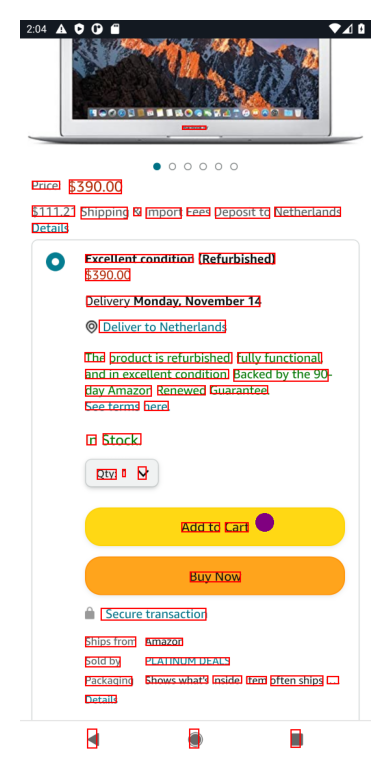

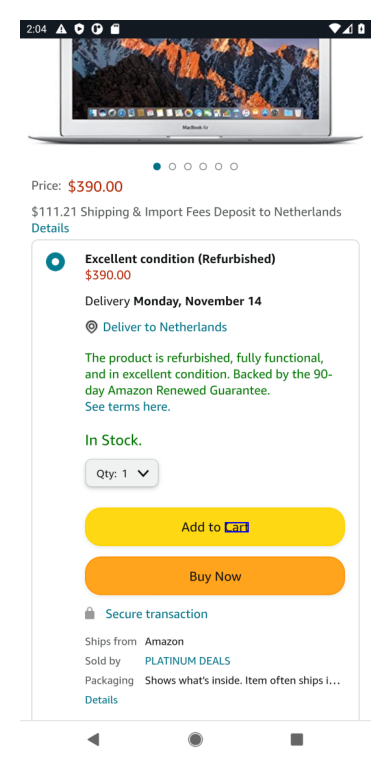

{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_16.png', 'screen_desc': 'This screenshot shows the Amazon product page for a refurbished MacBook Air priced at $390.00. The item is listed as in "Excellent condition" and comes with a 90-day Amazon Renewed Guarantee. The delivery is expected by Monday, November 14, and it is available for shipping to the Netherlands. The user can choose the quantity and either "Add to Cart" or "Buy Now." The item is "In Stock" and ships from Amazon, sold by Platinum Deals.'}
{'user_request': 'Show the shopping cart on amazon. Add "macbook air" to the cart on amazon', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-3572009480102797822/WEB_SHOPPING-3572009480102797822_16.png', 'screen_desc': 'This screenshot shows the Amaz

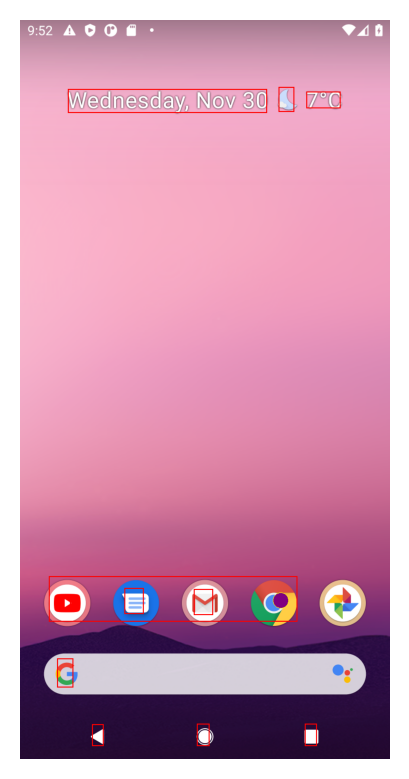

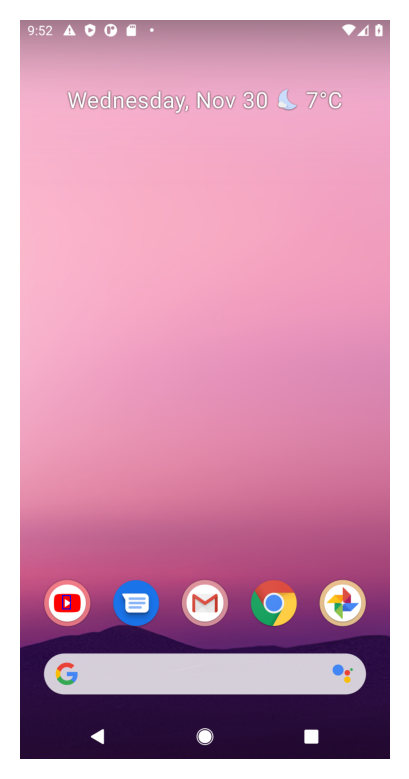

{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_0.png', 'screen_desc': 'The screenshot shows an Android home screen with a pink gradient wallpaper. The top displays the date, time (9:52), weather (7°C, clear night), and status icons for battery, Wi-Fi, and notifications. The bottom has a row of frequently used apps: YouTube, Messages, Gmail, Chrome, and Google Photos. A Google search bar with Assistant integration is positioned above the navigation buttons. The layout is minimalistic, with no widgets or additional icons on the home screen.'}
{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/

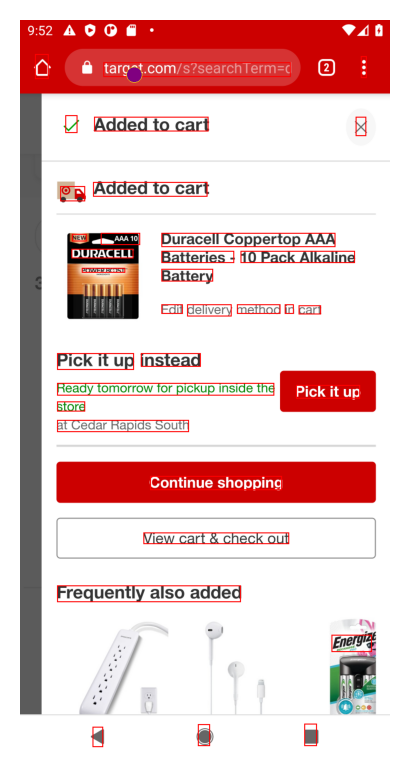

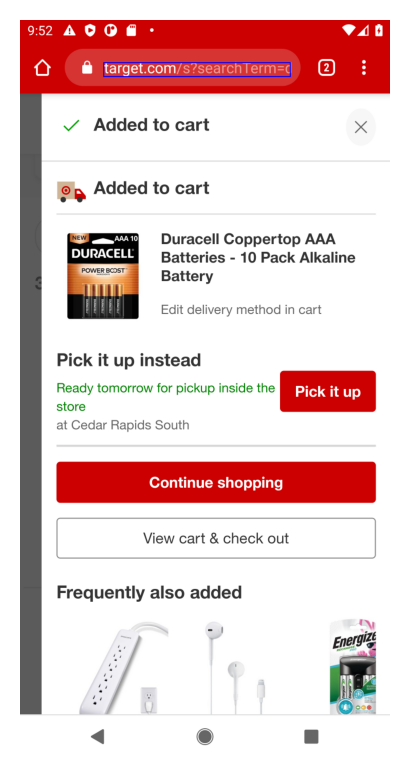

{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_1.png', 'screen_desc': "The screenshot displays a shopping cart from Target's mobile website. The user has added a 10-pack of Duracell Coppertop AAA batteries. There are options to either continue shopping or pick up the item in-store at Cedar Rapids South, available tomorrow. Additionally, items frequently added together, such as a power strip, earphones, and Energizer batteries, are suggested."}
{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_1.png', 'screen_desc': "The scr

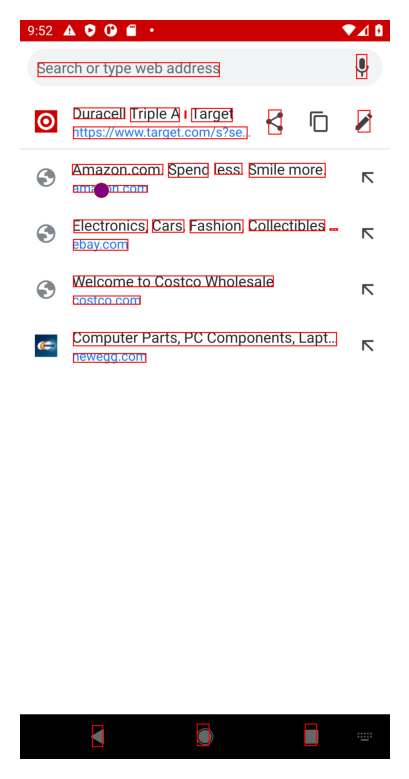

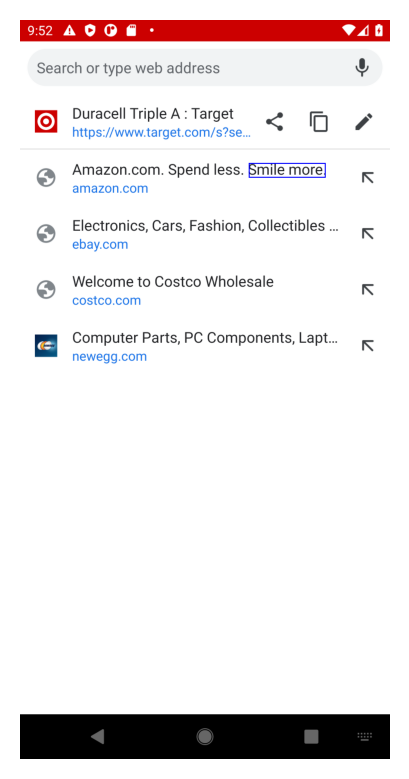

{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_2.png', 'screen_desc': 'This screenshot shows a web browser with a search bar at the top and a list of recently visited or suggested websites. The top entry is a Target product page for Duracell Triple A batteries, followed by links to Amazon, eBay, Costco, and Newegg. Each entry includes the website name, a brief description, and a clickable link. Some entries have a refresh icon, while others have an external link icon. The bottom of the screen displays navigation buttons, including back, home, and recent apps.'}
{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test

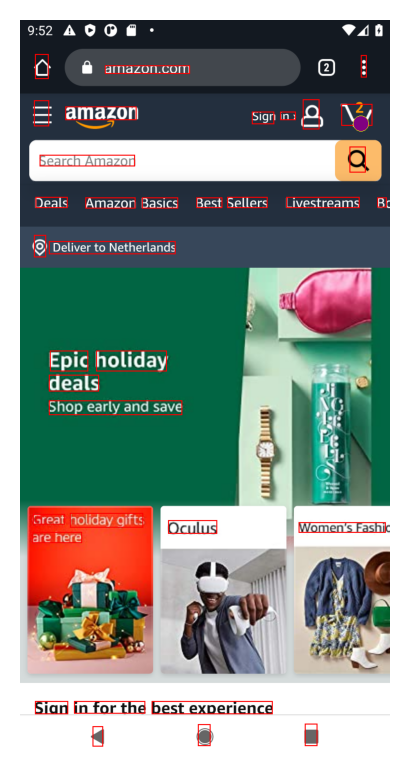

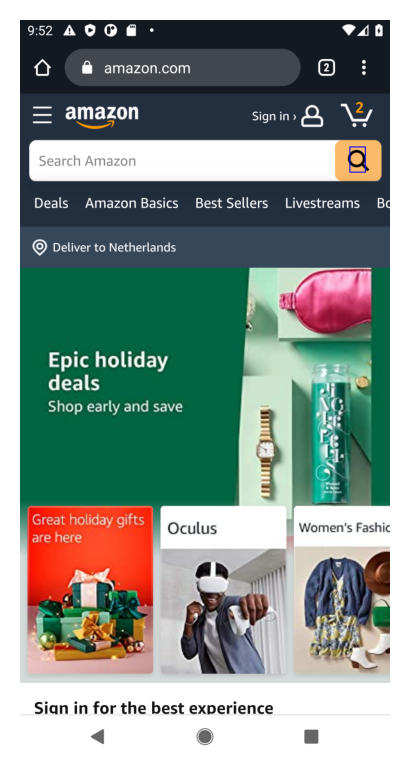

{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_3.png', 'screen_desc': "It looks like you uploaded an image, but I can't analyze it directly. However, if you describe the main elements you see on the screen (app icons, notifications, text, etc.), I can help summarize its content and functionality. Let me know what you need!"}
{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_3.png', 'screen_desc': "It looks like you uploaded an image, but I can't analyze it directly. However, if you describe the main elements you see on the 

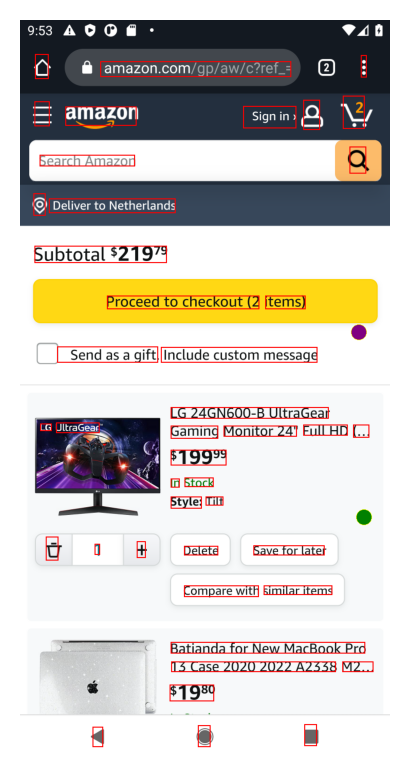

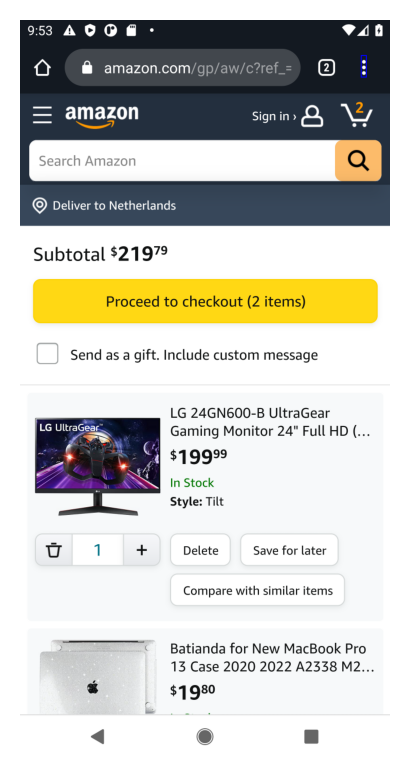

{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_4.png', 'screen_desc': 'The screenshot shows an Amazon shopping cart page with two items listed. The subtotal is $219.79, and it includes an LG UltraGear Gaming Monitor for $199.99 and a MacBook Pro case for $19.80. Options to proceed to checkout or save items for later are available. There is also an option to send the items as a gift. The page is set to deliver to the Netherlands.'}
{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_4.png', 'screen_desc': 'The screenshot shows

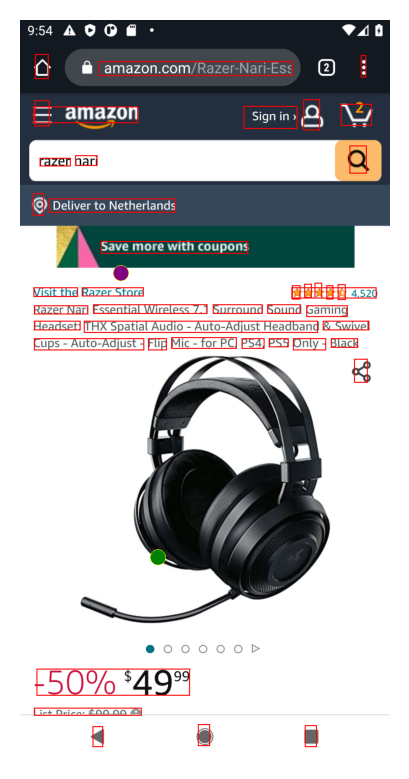

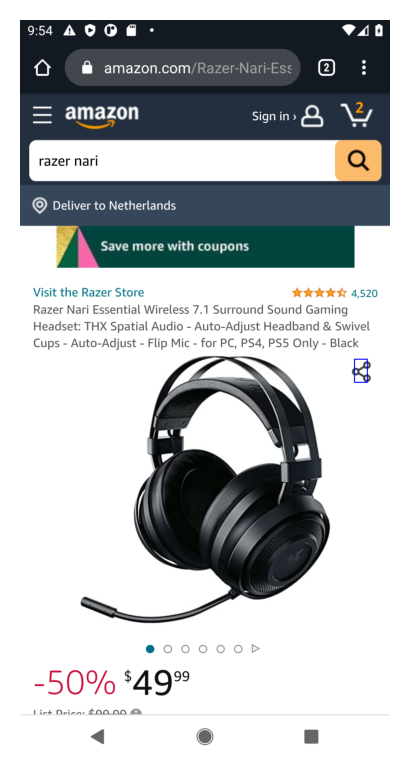

{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_10.png', 'screen_desc': 'The screenshot displays an Amazon product page for the "Razer Nari Essential Wireless 7.1 Surround Sound Gaming Headset." It highlights key features such as THX Spatial Audio, auto-adjusting headband and swivel cups, and a flip mic, compatible with PC, PS4, and PS5. The price shows a 50% discount, bringing the price to $49.99 from the original $99.99. The page also includes a high rating (4,520 reviews) and an option to visit the Razer store.'}
{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-1464055903123

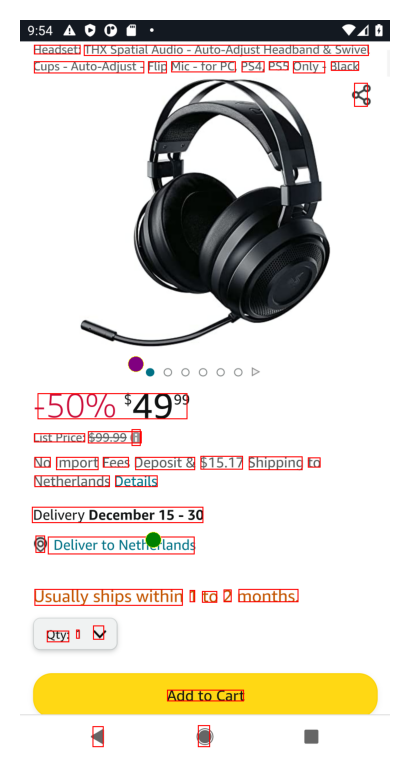

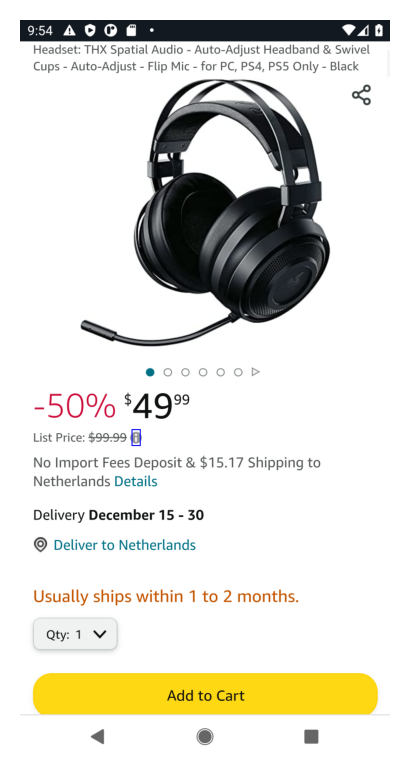

{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_11.png', 'screen_desc': 'The screenshot displays a product listing for a gaming headset with THX Spatial Audio, an auto-adjusting headband, and a flip microphone. It is currently on sale for $49.99, marked down from the original price of $99.99, showing a 50% discount. Shipping to the Netherlands is available, with a delivery estimate between December 15 and 30. The product is noted to usually ship within 1 to 2 months, and there is an option to add it to the cart.'}
{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-146405590312314

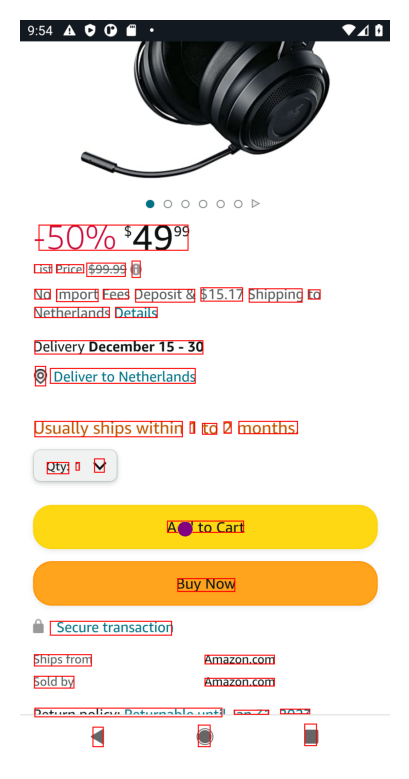

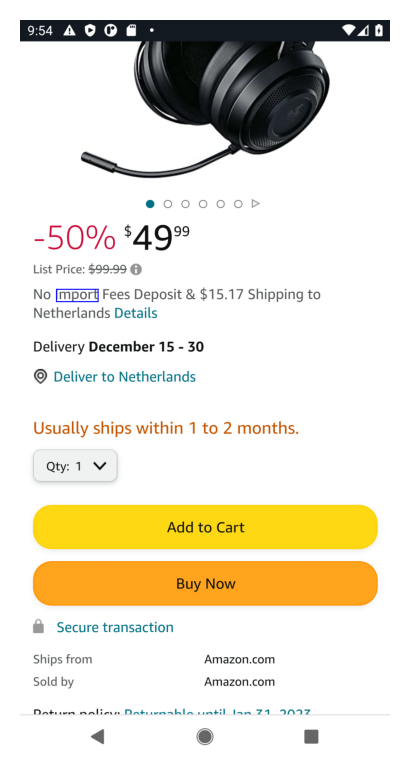

{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_12.png', 'screen_desc': 'This screenshot displays an Amazon product page for a pair of headphones, showing a 50% discount, bringing the price down to $49.99 from the original $99.99. It includes shipping details to the Netherlands, a delivery window between December 15-30, and a note that the item usually ships within 1-2 months. There are options to add the item to the cart or buy it immediately. Additionally, a "secure transaction" indicator and return policy details are also visible.'}
{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SH

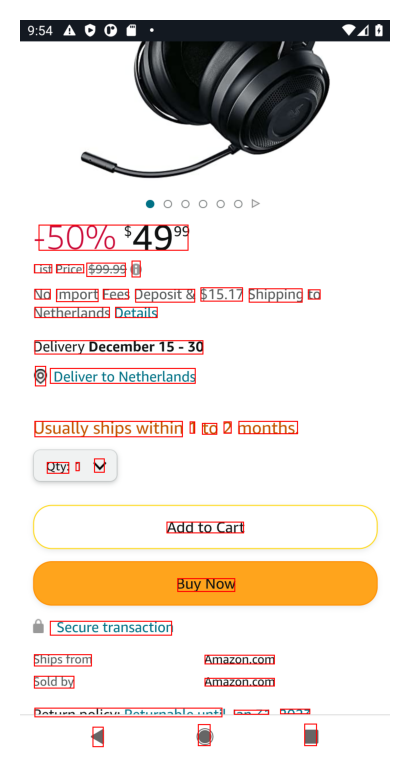

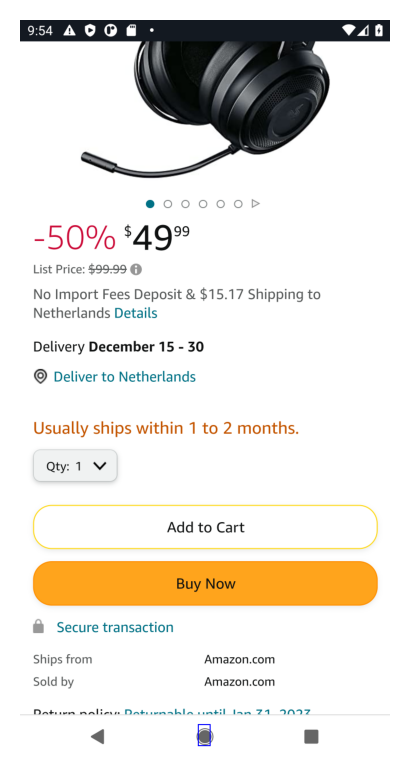

{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031231493138/WEB_SHOPPING-14640559031231493138_13.png', 'screen_desc': 'The screenshot shows a product page for a headset on Amazon. It is currently being offered at a 50% discount for $49.99, down from the original price of $99.99. The shipping fee to the Netherlands is $15.17, with a delivery window from December 15 to 30. The product is listed as shipping within 1 to 2 months, and options to "Add to Cart" or "Buy Now" are available. The page also displays secure transaction information and return policy details.'}
{'user_request': 'View the shopping cart on amazon. Search for razer nari on amazon, select the first entry, and add it to the cart.', 'image_path': '/root/GUI-Memory/data/android_in_the_zoo/test_sample/web_shopping/WEB_SHOPPING-14640559031

In [15]:
target_tasks = []
full_tasks = []
for task in tasks[:5]:
    print("\n\n\n************\n\n\n")
    print(task)
    memory = True
    if memory==True:
        task_dir = f"/root/GUI-Memory/CoAT/android-in-the-zoo/intermediate/openai/flow_with_memory/{task}"
        
        task_files = next(os.walk(task_dir))[-1]
        step_ids = list(set([
            int(file.split(".")[0].split("_")[1]) 
            if "web" not in file and "google_apps" not in file
            else int(file.split(".")[0].split("_")[2]) 
            for file in task_files]))        
        region, id = task.split("-")
        test_file = f"/root/GUI-Memory/data/android_in_the_zoo/test_sample/{region.lower()}/{region.upper()}-{id}/{region.upper()}-{id}.json"
        with open(test_file) as f:
            test_data = json.load(f)

        for i, id in enumerate(step_ids):
            # show observe
            with open(f"{task_dir}/{task}_{id}_0observe.json", "r") as f:
                observe = json.load(f)
            
            # show think_action
            with open(f"{task_dir}/{task}_{id}_1think.json", "r") as f:
                think = json.load(f)
            
            # show think_action
            with open(f"{task_dir}/{task}_{id}_2query.json", "r") as f:
                query = json.load(f)

            # show think_action
            with open(f"{task_dir}/{task}_{id}_3action_with_memory.json", "r") as f:
                action = json.load(f)

            # # show reflect
            # if os.path.exists(f"{task_dir}/{task}_{i}_4reflect.jsonl"):
            #     with open(f"{task_dir}/{task}_{i}_4reflect.jsonl", "r") as f:
            #         reflect = json.load(f)
                # print(reflect)
            # final action & ground truth
            with open(f"{task_dir}/{task}_{id}.json", "r") as f:
                final_action = json.load(f)
            
            ground_truth = {
                # "result_action_type":test_data[i]["result_action_type"],
                # "result_action_text":test_data[i]["result_action_text"],
                # "result_touch_yx":test_data[i]["result_touch_yx"],
                # "result_lift_yx":test_data[i]["result_lift_yx"],
                "coat_action_desc":test_data[i]["coat_action_desc"],
            }
            # 绘制边框与idx并可视化ground truth
            full_tasks.append(f"{task}_{id}")
            if query['result'] is not None:
                target_tasks.append(f"{task}_{id}")
                if final_action['action_predict']['COAT']['tag']['ACTION'] == 'click_element':
                    idx = final_action['action_predict']['COAT']['tag']['ARGS']['idx']
                    show_step_uis(test_data[i], idx)
                else:
                    show_step_uis(test_data[i])
            print(observe)
            print(think)
            print(query)
            print(action)
            print(final_action['action_desc'])
            print(ground_truth)

In [11]:
task_dir

'/root/GUI-Memory/CoAT/android-in-the-zoo/intermediate/openai/flow_with_memory/web_shopping-14640559031231493138'

In [14]:
target_tasks

['general-6458194457574888611_0',
 'general-6458194457574888611_2',
 'web_shopping-3415759859034183184_1',
 'web_shopping-3415759859034183184_2',
 'install-689623307793919007_0',
 'install-689623307793919007_1',
 'install-689623307793919007_2',
 'install-689623307793919007_3',
 'install-689623307793919007_4',
 'install-689623307793919007_5',
 'install-689623307793919007_6',
 'install-689623307793919007_7',
 'web_shopping-3572009480102797822_0',
 'web_shopping-3572009480102797822_1',
 'web_shopping-3572009480102797822_2',
 'web_shopping-3572009480102797822_5',
 'web_shopping-3572009480102797822_6',
 'web_shopping-3572009480102797822_8',
 'web_shopping-3572009480102797822_9',
 'web_shopping-3572009480102797822_10',
 'web_shopping-3572009480102797822_15',
 'web_shopping-3572009480102797822_16',
 'web_shopping-14640559031231493138_0',
 'web_shopping-14640559031231493138_1',
 'web_shopping-14640559031231493138_2',
 'web_shopping-14640559031231493138_3',
 'web_shopping-14640559031231493138_4

In [17]:
len(full_tasks)

56